In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re
import seaborn as sns
print('seaborn versiont:',sns.__version__)
import os
import warnings
warnings.filterwarnings('ignore')

seaborn versiont: 0.12.2






id                            12798
member_id                     12798
loan_amnt                     12798
funded_amnt                   12798
funded_amnt_inv               12798
                              ...  
tax_liens                     12798
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


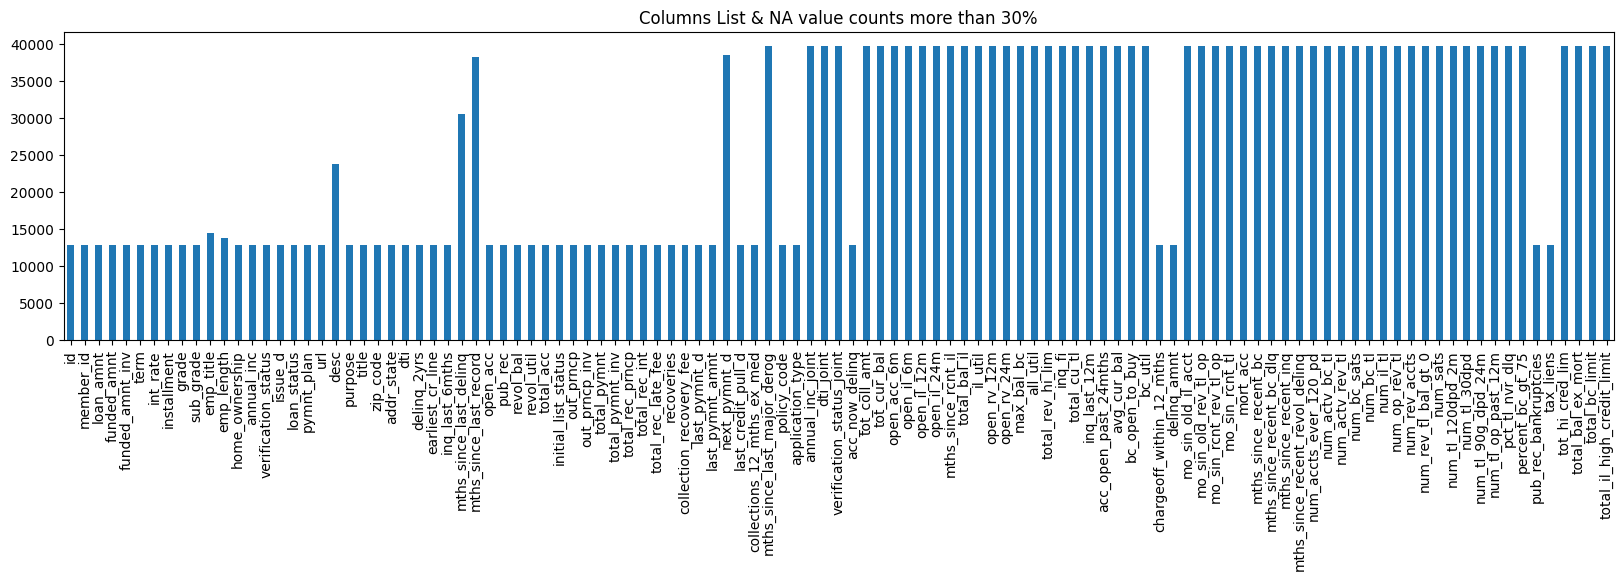

Number of Columns dropped	:  111

Old dataset rows,columns (39717, 111) nNew dataset rows,columns (39717, 0)

Number of Rows droppedt:  0

Old dataset rows,columns (39717, 0) nNew dataset rows,columns (39717, 0)
So now we are left with (39717, 0) rows & columns.


AttributeError: ignored

In [13]:
# Data Sourcing
loan = pd.read_csv('/content/loan.csv')
loan.head(2)

print('\n\n\n')
NA_col = loan.isnull().sum()
print(NA_col)
# Prints the total number of entries that have null value in specified columns

NA_col = NA_col[NA_col.values >(0.2*len(loan))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('Columns List & NA value counts more than 30%')
plt.show()

# Data Cleaning
def removenulls(dataframe, axis = 1, percent = 0.3):
  df = dataframe.copy()
  ishape = df.shape
  if axis == 0:
    rownames = df.transpose().isnull().sum()
    rownames = list(rownames[rownames.values > percent*len(df)].index)
    df.drop(df.index[rownames], inplace = True)
    print("\nNumber of Rows droppedt: ",len(rownames))
  else:
    colnames = (df.isnull().sum()/len(df))
    colnames = list(colnames[colnames.values>=percent].index)
    df.drop(labels = colnames, axis=1,inplace = True)
    print("Number of Columns dropped\t: ",len(colnames))
  print("\nOld dataset rows,columns",ishape,"nNew dataset rows,columns",df.shape)
  return df
#remove columns where NA values greater than or equal to 30%
loan = removenulls(loan, axis = 1, percent = 0.3)
#remove rows where NA values greater than or equal to 30%
loan = removenulls(loan, axis = 0, percent = 0.3)
#remove columns with only one unique values
unique = loan.nunique()
unique = unique[unique.values == 1]
loan.drop(labels = list(unique.index),axis = 1, inplace = True)
print("So now we are left with",loan.shape ,"rows & columns.")

#replace the values of NA with self-employed.
# print(loan.sub_grade.unique())
# loan.emp_length.fillna('0',inplace = True)
# loan.emp_length.replace(['n/a'],'Self-employed', inplace = True)
# print(loan.emp_length.unique())

# Remove any columns that arent relevant
# not_required_columns = ["id","member_id","url","zip_code"]
# loan.drop(labels = not_required_columns, axis=1,inplace = True)
# print("So now we are left with ",loan.shape, " rows & columns.")

# COnvert all continuous variables to numeric values
# numeric_columns = ['loan_amt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
# loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)
# loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)
# loan.int_ratee.unique()
# loan['int_rate'] = (pd.to_numeric(loan['int_rate'].str.replace(r'%', ' ')))
# loan.int_rate
# loan['int_rate_bkp'] = loan['int_rate']

#Removing records of loan purpose with values less than 0.75%
del_loan_purpose = (loan.purpose.value_counts()*100)/len(loan)
del_loan_purpose = del_loan_purpose[(del_loan_purpose > 0.75) | (del_loan_purpose.index == 'other')]
loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with ",loan.shape," rows and columns")
print(loan.purpose.unique())
